In [1]:
import numpy as np
import json
from pathlib import Path
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
embeddings = np.load("../../data/processed/embeddings.npy")
with open("../../data/processed/filenames.json", 'r') as f:
    filenames = json.load(f)

print(f"{len(embeddings)} documents")
print(f"Embedding dimensions: {embeddings.shape[1]}")

64 documents
Embedding dimensions: 384


In [3]:
similarity_matrix = cosine_similarity(embeddings)

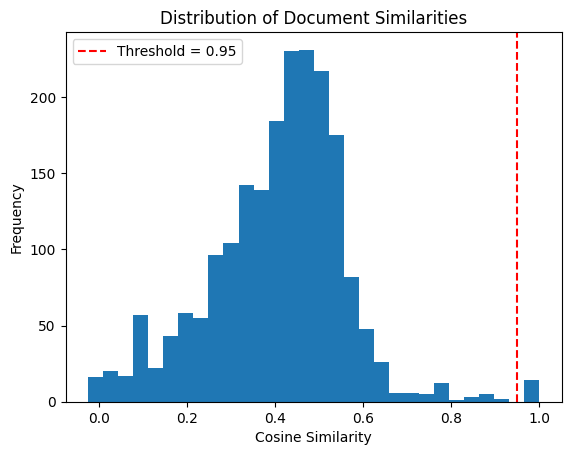

In [ ]:
upper_triangle = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
threshold = 0.95

plt.hist(upper_triangle, bins=30)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarities')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.legend()
plt.show()

In [ ]:
duplicates = []

for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        if similarity_matrix[i][j] > threshold:
            duplicates.append((i, j, similarity_matrix[i][j]))

duplicates

[(0, 1, np.float32(0.99999946)),
 (3, 19, np.float32(1.0000004)),
 (7, 17, np.float32(1.0000005)),
 (10, 30, np.float32(0.9702288)),
 (10, 33, np.float32(0.96966076)),
 (10, 44, np.float32(0.9702288)),
 (12, 13, np.float32(0.987658)),
 (12, 56, np.float32(1.0000001)),
 (13, 56, np.float32(0.987658)),
 (30, 33, np.float32(0.99959725)),
 (30, 44, np.float32(1.0)),
 (33, 44, np.float32(0.99959725)),
 (54, 55, np.float32(0.99999976)),
 (58, 63, np.float32(1.0000001))]